## cbyieldcurve_info_final

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/cbyieldcurve_info_final.csv')

# Display the first few rows of the data
print(df.head())

# Check the data types and missing values
print(df.info())


    enddate     yield
0  20201102  0.031500
1  20201103  0.031500
2  20201104  0.031502
3  20201105  0.031400
4  20201106  0.031408
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   enddate  506 non-null    int64  
 1   yield    506 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 8.0 KB
None


In [5]:
df['enddate'] = pd.to_datetime(df['enddate'], format='%Y%m%d')

# Check for missing values
print(df.isnull().sum())

# Check if the dates are sorted
print(df['enddate'].is_monotonic_increasing)

enddate    0
yield      0
dtype: int64
True


In [6]:
# Calculate basic statistics for 'yield'
yield_stats = df['yield'].describe()
print(yield_stats)


count    506.000000
mean       0.026229
std        0.003577
min        0.018950
25%        0.023800
50%        0.026800
75%        0.028850
max        0.033100
Name: yield, dtype: float64


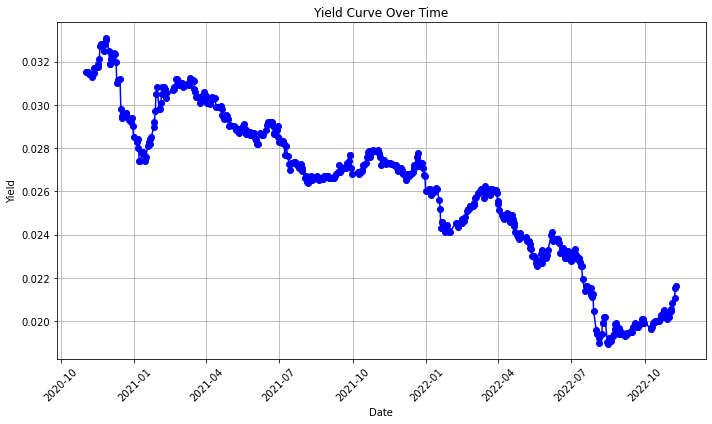

In [7]:
import matplotlib.pyplot as plt

# Plot the yield curve over time
plt.figure(figsize=(10, 6))
plt.plot(df['enddate'], df['yield'], marker='o', linestyle='-', color='b', label='Yield')
plt.title('Yield Curve Over Time')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


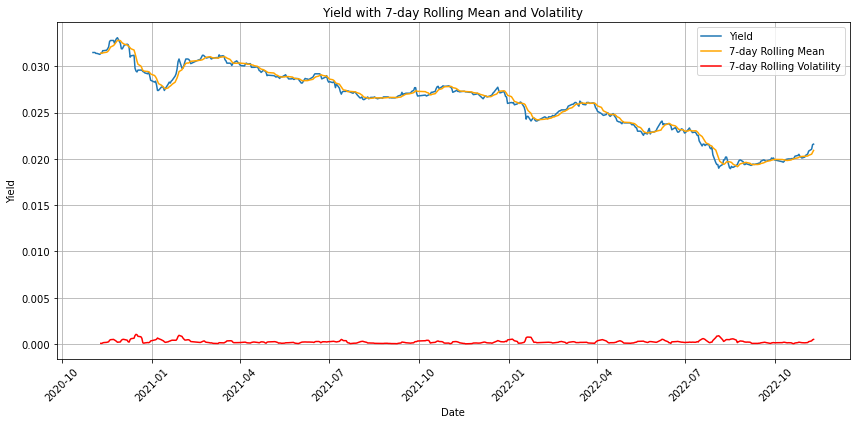

In [9]:
# Calculate rolling mean (7-day moving average)
df['rolling_mean_7'] = df['yield'].rolling(window=7).mean()

# Calculate rolling standard deviation (7-day rolling volatility)
df['rolling_volatility_7'] = df['yield'].rolling(window=7).std()

# Plot the rolling mean and volatility
plt.figure(figsize=(12, 6))
plt.plot(df['enddate'], df['yield'], label='Yield')
plt.plot(df['enddate'], df['rolling_mean_7'], label='7-day Rolling Mean', color='orange')
plt.plot(df['enddate'], df['rolling_volatility_7'], label='7-day Rolling Volatility', color='red')
plt.title('Yield with 7-day Rolling Mean and Volatility')
plt.xlabel('Date')
plt.ylabel('Yield')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


## product_info_simple_final_train

In [12]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/product_info_simple_final_train.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the data types and missing values
print(df.info())


  product_pid  transaction_date  apply_amt  redeem_amt  net_in_amt  \
0    product1          20210104   0.001642    0.000851    0.000791   
1    product1          20210105   0.000170    0.002983   -0.002813   
2    product1          20210106   0.002941    0.001342    0.001599   
3    product1          20210107   0.005226    0.000000    0.005226   
4    product1          20210108   0.002587    0.000000    0.002587   

   uv_fundown  uv_stableown  uv_fundopt  uv_fundmarket  uv_termmarket  \
0    791827.0           0.0   8203723.0            0.0            0.0   
1    595051.0           0.0   4432183.0            0.0            0.0   
2    759031.0           0.0   6924679.0            0.0            0.0   
3    299887.0           0.0   4399387.0            0.0            0.0   
4    267091.0           0.0   2333239.0            0.0            0.0   

   during_days  total_net_value  
0          0.0              NaN  
1          0.0              NaN  
2          0.0              NaN  
3   

In [13]:
# Check for missing values
print(df.isnull().sum())

# Handle missing values (example: forward fill for uv_fundown, etc.)
df['uv_fundown'].fillna(method='ffill', inplace=True)
df['uv_stableown'].fillna(method='ffill', inplace=True)
df['uv_fundopt'].fillna(method='ffill', inplace=True)
df['uv_fundmarket'].fillna(method='ffill', inplace=True)
df['uv_termmarket'].fillna(method='ffill', inplace=True)
df['during_days'].fillna(df['during_days'].mean(), inplace=True)
df['total_net_value'].fillna(df['total_net_value'].mean(), inplace=True)

# Ensure no missing values
print(df.isnull().sum())


product_pid             0
transaction_date        0
apply_amt               0
redeem_amt              0
net_in_amt              0
uv_fundown              0
uv_stableown            0
uv_fundopt              0
uv_fundmarket           0
uv_termmarket           0
during_days           174
total_net_value     28160
dtype: int64
product_pid         0
transaction_date    0
apply_amt           0
redeem_amt          0
net_in_amt          0
uv_fundown          0
uv_stableown        0
uv_fundopt          0
uv_fundmarket       0
uv_termmarket       0
during_days         0
total_net_value     0
dtype: int64


In [14]:
# Convert 'transaction_date' to datetime
df['transaction_date'] = pd.to_datetime(df['transaction_date'], format='%Y%m%d')

# Verify the conversion
print(df['transaction_date'].head())


0   2021-01-04
1   2021-01-05
2   2021-01-06
3   2021-01-07
4   2021-01-08
Name: transaction_date, dtype: datetime64[ns]


In [15]:
# Recalculate 'net_in_amt' to ensure it's correct
df['net_in_amt'] = df['apply_amt'] - df['redeem_amt']

# Verify if the recalculated 'net_in_amt' matches the original
print(df[['apply_amt', 'redeem_amt', 'net_in_amt']].head())


   apply_amt  redeem_amt  net_in_amt
0   0.001642    0.000851    0.000791
1   0.000170    0.002983   -0.002813
2   0.002941    0.001342    0.001599
3   0.005226    0.000000    0.005226
4   0.002587    0.000000    0.002587


In [16]:
# Extract time-based features
df['year'] = df['transaction_date'].dt.year
df['month'] = df['transaction_date'].dt.month
df['day'] = df['transaction_date'].dt.day
df['weekday'] = df['transaction_date'].dt.weekday
df['is_weekend'] = df['weekday'].isin([5, 6])  # 5=Saturday, 6=Sunday

# Display the new features
print(df[['transaction_date', 'year', 'month', 'weekday', 'is_weekend']].head())


  transaction_date  year  month  weekday  is_weekend
0       2021-01-04  2021      1        0       False
1       2021-01-05  2021      1        1       False
2       2021-01-06  2021      1        2       False
3       2021-01-07  2021      1        3       False
4       2021-01-08  2021      1        4       False


In [17]:
# Forward fill or Backward fill for 'during_days'
df['during_days'].fillna(method='ffill', inplace=True)  # or df['during_days'].fillna(method='bfill', inplace=True)

# Alternatively, use mean or median
# df['during_days'].fillna(df['during_days'].mean(), inplace=True)
# df['during_days'].fillna(df['during_days'].median(), inplace=True)

# Check if missing values are handled
print(df['during_days'].isnull().sum())


0


In [18]:
# Forward fill or Backward fill for 'total_net_value'
df['total_net_value'].fillna(method='ffill', inplace=True)  # or df['total_net_value'].fillna(method='bfill', inplace=True)

# Alternatively, use mean or median
# df['total_net_value'].fillna(df['total_net_value'].mean(), inplace=True)
# df['total_net_value'].fillna(df['total_net_value'].median(), inplace=True)

# Check if missing values are handled
print(df['total_net_value'].isnull().sum())


0


In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Initialize the scaler (StandardScaler or MinMaxScaler)
scaler = StandardScaler()

# Select relevant columns for scaling
columns_to_scale = ['apply_amt', 'redeem_amt', 'net_in_amt', 'uv_fundown', 'uv_stableown', 'uv_fundopt', 
                    'uv_fundmarket', 'uv_termmarket', 'during_days', 'total_net_value']

# Apply the scaler
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Verify the scaling
print(df[columns_to_scale].head())


   apply_amt  redeem_amt  net_in_amt  uv_fundown  uv_stableown  uv_fundopt  \
0  -0.399004   -0.347085   -0.169108   -0.297667     -0.514526   -0.444885   
1  -0.399116   -0.346859   -0.169419   -0.297705     -0.514526   -0.446463   
2  -0.398905   -0.347033   -0.169038   -0.297673     -0.514526   -0.445420   
3  -0.398731   -0.347175   -0.168726   -0.297762     -0.514526   -0.446476   
4  -0.398932   -0.347175   -0.168953   -0.297769     -0.514526   -0.447340   

   uv_fundmarket  uv_termmarket  during_days  total_net_value  
0      -0.111557      -0.286014    -0.548632    -1.914764e-14  
1      -0.111557      -0.286014    -0.548632    -1.914764e-14  
2      -0.111557      -0.286014    -0.548632    -1.914764e-14  
3      -0.111557      -0.286014    -0.548632    -1.914764e-14  
4      -0.111557      -0.286014    -0.548632    -1.914764e-14  


In [21]:
# Sort data by transaction_date
df = df.sort_values(by='transaction_date')

# Verify sorting
print(df[['transaction_date', 'apply_amt', 'redeem_amt', 'net_in_amt']].head())


      transaction_date  apply_amt  redeem_amt  net_in_amt
0           2021-01-04  -0.399004   -0.347085   -0.169108
24656       2021-01-04   1.708127    1.786467    0.479943
25104       2021-01-04  -0.318106   -0.198552   -0.198266
25552       2021-01-04  -0.399129   -0.347171   -0.169180
26399       2021-01-04  -0.399100   -0.347159   -0.169156


In [22]:
# Create lag features for 'apply_amt' and 'redeem_amt' (e.g., 3-day lag)
df['apply_amt_lag_3'] = df['apply_amt'].shift(3)
df['redeem_amt_lag_3'] = df['redeem_amt'].shift(3)

# Drop rows with missing lag values (due to shifting)
df.dropna(subset=['apply_amt_lag_3', 'redeem_amt_lag_3'], inplace=True)

# Display the new features
print(df[['transaction_date', 'apply_amt', 'redeem_amt', 'apply_amt_lag_3', 'redeem_amt_lag_3']].head())


      transaction_date  apply_amt  redeem_amt  apply_amt_lag_3  \
25552       2021-01-04  -0.399129   -0.347171        -0.399004   
26399       2021-01-04  -0.399100   -0.347159         1.708127   
26840       2021-01-04  -0.399129   -0.347139        -0.318106   
27399       2021-01-04  -0.395173   -0.346871        -0.399129   
27845       2021-01-04  -0.380457   -0.337279        -0.399100   

       redeem_amt_lag_3  
25552         -0.347085  
26399          1.786467  
26840         -0.198552  
27399         -0.347171  
27845         -0.347159  


In [23]:
# Example: Identify outliers using IQR for 'apply_amt'
Q1 = df['apply_amt'].quantile(0.25)
Q3 = df['apply_amt'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers for 'apply_amt'
df = df[(df['apply_amt'] >= lower_bound) & (df['apply_amt'] <= upper_bound)]

# Verify the removal of outliers
print(df[['transaction_date', 'apply_amt']].head())


      transaction_date  apply_amt
25552       2021-01-04  -0.399129
26399       2021-01-04  -0.399100
26840       2021-01-04  -0.399129
27399       2021-01-04  -0.395173
27845       2021-01-04  -0.380457
